Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560655 entries, 0 to 560654
Data columns (total 13 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   0                                           560655 non-null  int64  
 1   Electricity:Facility [kW](Hourly)           560655 non-null  float64
 2   Fans:Electricity [kW](Hourly)               560655 non-null  float64
 3   Cooling:Electricity [kW](Hourly)            560655 non-null  float64
 4   Heating:Electricity [kW](Hourly)            560655 non-null  float64
 5   InteriorLights:Electricity [kW](Hourly)     560655 non-null  float64
 6   InteriorEquipment:Electricity [kW](Hourly)  560655 non-null  float64
 7   Gas:Facility [kW](Hourly)                   560655 non-null  float64
 8   Heating:Gas [kW](Hourly)                    560655 non-null  float64
 9   InteriorEquipment:Gas [kW](Hourly)          560655 non-n

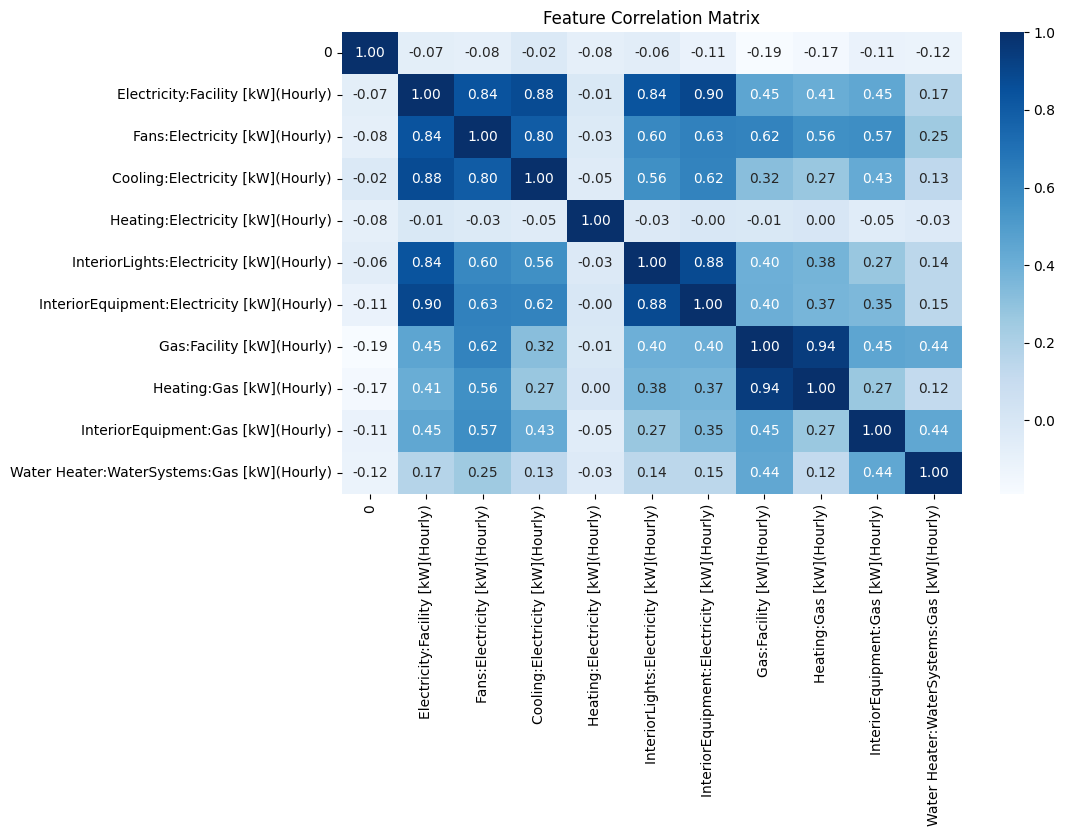

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree



file_path = "df.csv"  
df = pd.read_csv(file_path)


print("Dataset Info:")
print(df.info())


print("\nFirst 5 rows of the dataset:")
print(df.head())


print("\nSummary Statistics:")
print(df.describe())


print("\nMissing Values:")
print(df.isnull().sum())


plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


Accuracy: 0.6833703436159492

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85     66365
           1       0.37      0.29      0.33     10216
           2       1.00      1.00      1.00      4595
           3       0.38      0.33      0.35      8870
           4       0.50      0.72      0.59      8292
           5       0.36      0.86      0.51      6710
           6       0.11      0.04      0.05      7083

    accuracy                           0.68    112131
   macro avg       0.51      0.58      0.53    112131
weighted avg       0.69      0.68      0.68    112131



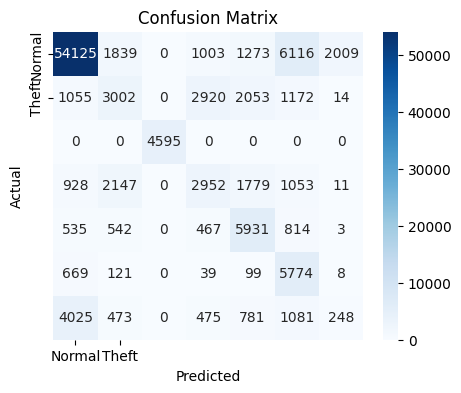

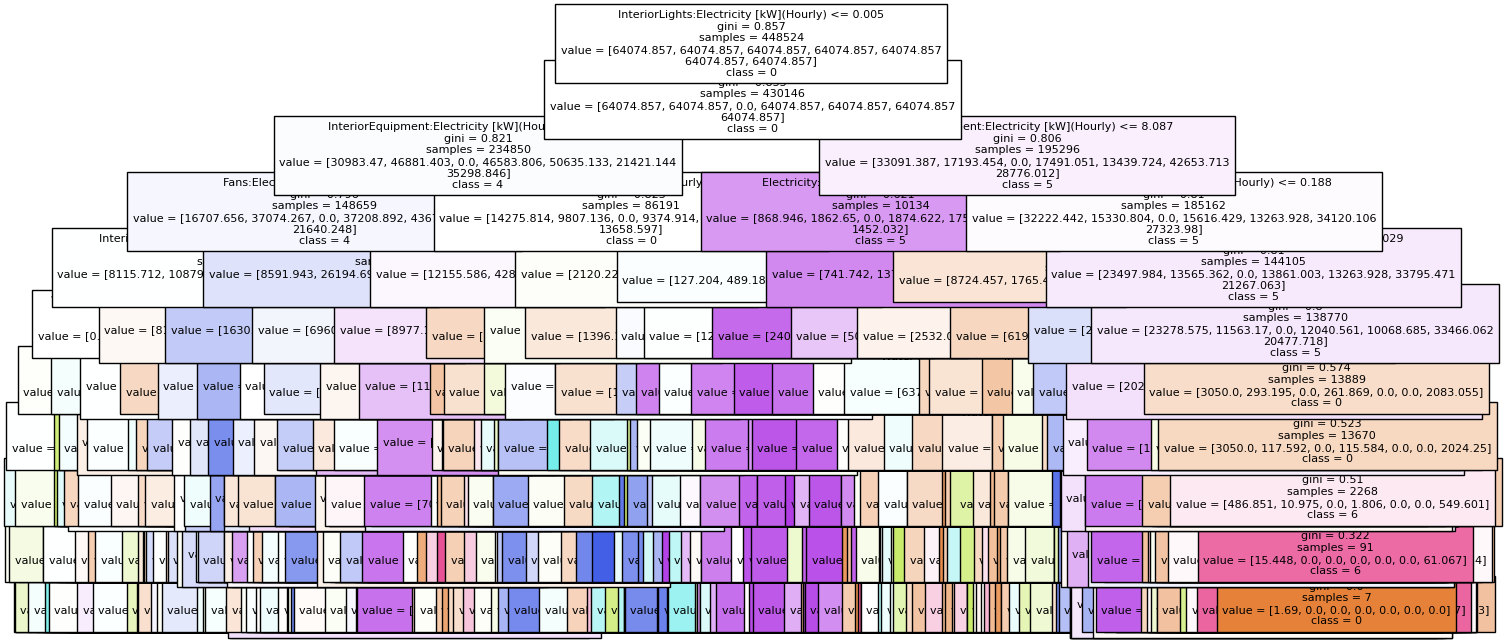

In [2]:
# Encode categorical target variable
label_enc = LabelEncoder()
df["theft"] = label_enc.fit_transform(df["theft"])  # Convert 'Normal'/'Theft' to 0/1

# Select numerical features and target variable
X = df.select_dtypes(include=['number']).drop(columns=["0", "theft"])  # Drop index column
y = df["theft"]

# Stratified Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train a simple Decision Tree Classifier
clf = DecisionTreeClassifier(class_weight="balanced", max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Theft"], yticklabels=["Normal", "Theft"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(15, 8))
class_names = list(map(str, clf.classes_))  # Convert to strings if needed
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names, fontsize=8)
plt.show()


In [ ]:
# I did not do anyththing hehehe

Accuracy: 0.8418
Macro F1 Score: 0.7394
Cohen's Kappa Score: 0.7435
AUC Score: 0.9213

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     66365
           1       0.69      0.76      0.72     10216
           2       1.00      1.00      1.00      4595
           3       0.71      0.57      0.63      8870
           4       0.86      0.93      0.89      8292
           5       0.92      0.94      0.93      6710
           6       0.07      0.06      0.06      7083

    accuracy                           0.84    112131
   macro avg       0.74      0.74      0.74    112131
weighted avg       0.83      0.84      0.84    112131



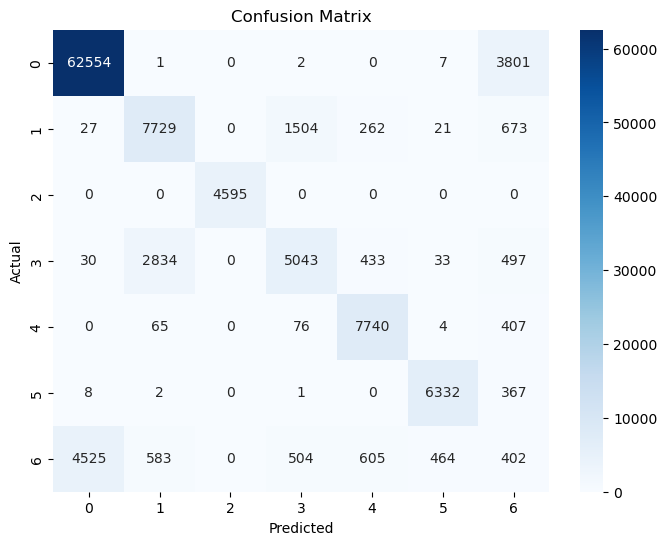

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, cohen_kappa_score, roc_auc_score

# Load the dataset
dataset_url = "df.csv"  # Replace with actual download path
df = pd.read_csv(dataset_url)

# Encode categorical target variable
label_enc = LabelEncoder()
df["theft"] = label_enc.fit_transform(df["theft"])

# Select numerical features and target variable
features = [
    "Electricity:Facility [kW](Hourly)", "Fans:Electricity [kW](Hourly)",
    "Cooling:Electricity [kW](Hourly)", "Heating:Electricity [kW](Hourly)",
    "InteriorLights:Electricity [kW](Hourly)", "InteriorEquipment:Electricity [kW](Hourly)",
    "Gas:Facility [kW](Hourly)", "Heating:Gas [kW](Hourly)",
    "InteriorEquipment:Gas [kW](Hourly)", "Water Heater:WaterSystems:Gas [kW](Hourly)"
]
X = df[features]
y = df["theft"]  # Correct column name


# Normalize feature values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average="macro")
kappa = cohen_kappa_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class="ovr")

print(f"Accuracy: {accuracy:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")
print(f"Cohen's Kappa Score: {kappa:.4f}")
print(f"AUC Score: {auc_score:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



Binary Confusion Matrix for Class 0:
[[41176  4590]
 [ 3811 62554]]


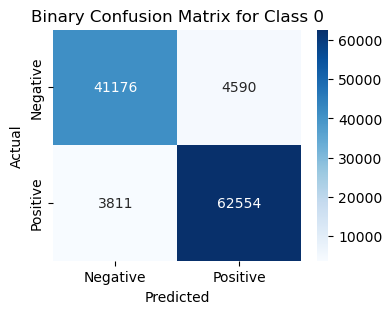


Binary Confusion Matrix for Class 1:
[[98430  3485]
 [ 2487  7729]]


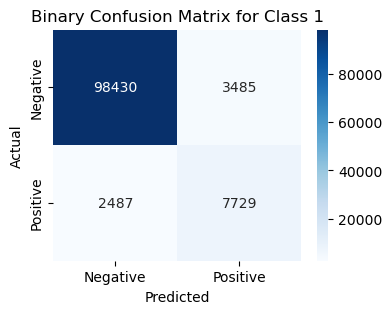


Binary Confusion Matrix for Class 2:
[[107536      0]
 [     0   4595]]


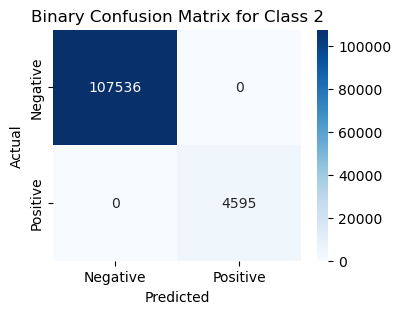


Binary Confusion Matrix for Class 3:
[[101174   2087]
 [  3827   5043]]


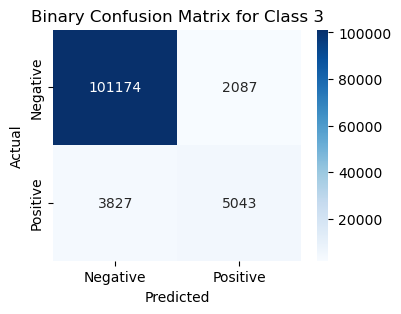


Binary Confusion Matrix for Class 4:
[[102539   1300]
 [   552   7740]]


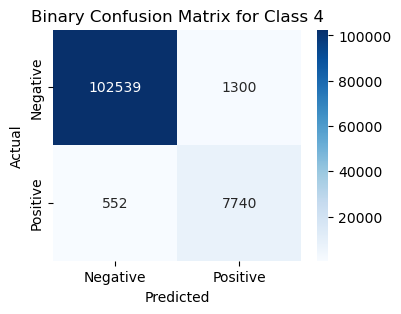


Binary Confusion Matrix for Class 5:
[[104892    529]
 [   378   6332]]


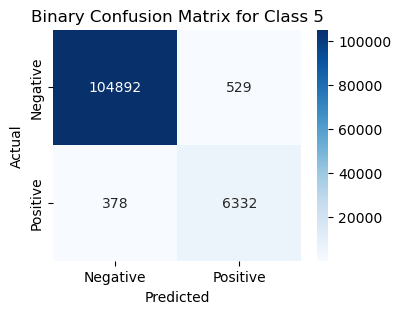


Binary Confusion Matrix for Class 6:
[[99303  5745]
 [ 6681   402]]


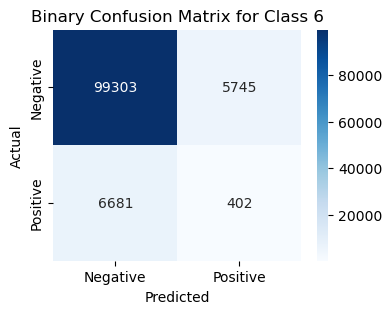

In [17]:
original_cm = confusion_matrix(y_test, y_pred)
num_classes = original_cm.shape[0]

# Function to compute 2x2 confusion matrix for each class
def get_binary_conf_matrix(original_cm, target_class):
    TP = original_cm[target_class, target_class]  # Correctly predicted target class
    FN = np.sum(original_cm[target_class, :]) - TP  # Target class misclassified as others
    FP = np.sum(original_cm[:, target_class]) - TP  # Other classes misclassified as target
    TN = np.sum(original_cm) - (TP + FP + FN)  # Everything else

    return np.array([[TN, FP], [FN, TP]])

# Compute and display all 2x2 confusion matrices
binary_conf_matrices = {cls: get_binary_conf_matrix(original_cm, cls) for cls in range(num_classes)}

# Print all 2x2 confusion matrices
for cls, cm in binary_conf_matrices.items():
    print(f"\nBinary Confusion Matrix for Class {cls}:")
    print(cm)

    # Plot Heatmap
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Binary Confusion Matrix for Class {cls}")
    plt.show()
